In [1]:
import requests
import os
import datetime
import json
import pandas as pd
import mplfinance as mpf
import random

In [115]:
uri = 'http://192.168.100.111:3334/candle5'
headers = {'Content-Type': 'application/json'}

In [116]:
start = str(datetime.datetime(2021, 7, 11, 0, 0, 0, 0).timestamp()*1000).replace(".0", "")
end = str(datetime.datetime(2021, 7, 12, 0, 0, 0, 0).timestamp()*1000).replace(".0", "")

In [183]:
uri = f'{uri}?from={start}&to={end}'

In [184]:
uri

'http://192.168.100.111:3334/candle5?from=1625929200000&to=1626015600000'

In [185]:
result = requests.get(uri, headers=headers)
result

<Response [200]>

In [186]:
ticks = json.loads(result.text)['ticks']

In [187]:
ticks

[{'high': 3696121,
  'low': 3693599,
  'timestamp': 1625955300000,
  'first': '3696121.0',
  'last': '3697923.0',
  'trend': 1,
  'sar': 3693599},
 {'high': 3698409,
  'low': 3695802,
  'timestamp': 1625955600000,
  'first': '3698409.0',
  'last': '3693952.0',
  'trend': 1,
  'sar': 3693791.4},
 {'high': 3695249,
  'low': 3694510,
  'timestamp': 1625955900000,
  'first': '3695249.0',
  'last': '3691307.0',
  'trend': -1,
  'sar': 3698331.02},
 {'high': 3693882,
  'low': 3690583,
  'timestamp': 1625956200000,
  'first': '3691142.0',
  'last': '3692062.0',
  'trend': -1,
  'sar': 3698021.0992},
 {'high': 3696235,
  'low': 3693121,
  'timestamp': 1625956500000,
  'first': '3693121.0',
  'last': '3699479.0',
  'trend': 1,
  'sar': 3690696.04},
 {'high': 3699507,
  'low': 3695409,
  'timestamp': 1625956800000,
  'first': '3699488.0',
  'last': '3696001.0',
  'trend': 1,
  'sar': 3691048.4784},
 {'high': 3699434,
  'low': 3697568,
  'timestamp': 1625957100000,
  'first': '3698326.0',
  'last

In [2]:
start = str(datetime.datetime(2021, 7, 12, 0, 0, 0, 0).timestamp()*1000).replace(".0", "")
end = str(datetime.datetime(2021, 10, 13, 0, 0, 0, 0).timestamp()*1000).replace(".0", "")

In [199]:
uri = 'http://192.168.100.111:3334/candle5'
headers = {'Content-Type': 'application/json'}
uri = f'{uri}?from={start}&to={end}'

In [200]:
result = requests.get(uri, headers=headers)
result

<Response [200]>

In [201]:
ticksAfter = json.loads(result.text)['ticks']

In [202]:
ticksAfter

[{'high': 3739100,
  'low': 3735602,
  'timestamp': 1626015600000,
  'first': '3735602.0',
  'last': '3732461.0',
  'trend': -1,
  'sar': 3739100},
 {'high': 3732462,
  'low': 3730001,
  'timestamp': 1626015900000,
  'first': '3732462.0',
  'last': '3738017.0',
  'trend': -1,
  'sar': 3738736.04},
 {'high': 3738144,
  'low': 3737294,
  'timestamp': 1626016200000,
  'first': '3737294.0',
  'last': '3739698.0',
  'trend': 1,
  'sar': 3730163.86},
 {'high': 3741911,
  'low': 3739000,
  'timestamp': 1626016500000,
  'first': '3740000.0',
  'last': '3736320.0',
  'trend': 1,
  'sar': 3730633.7456},
 {'high': 3737000,
  'low': 3735001,
  'timestamp': 1626016800000,
  'first': '3736360.0',
  'last': '3734351.0',
  'trend': 1,
  'sar': 3731084.835776},
 {'high': 3734219,
  'low': 3733657,
  'timestamp': 1626017100000,
  'first': '3734219.0',
  'last': '3736370.0',
  'trend': 1,
  'sar': 3731517.88234496},
 {'high': 3741004,
  'low': 3738435,
  'timestamp': 1626017400000,
  'first': '3738800.0'

In [117]:
import pandas as pd
import mplfinance as mpf
import datetime

In [203]:
data = {}
for tick in ticks:
    data[tick['timestamp']] = (float(tick['high']), float(tick['low']), float(tick['first']), float(tick['last']), datetime.datetime.fromtimestamp(float(tick['timestamp'])/1000))
for tick in ticksAfter:
    data[tick['timestamp']] = (float(tick['high']), float(tick['low']), float(tick['first']), float(tick['last']), datetime.datetime.fromtimestamp(float(tick['timestamp'])/1000))

In [204]:
df = pd.DataFrame.from_dict(data, orient='index', columns = ['High', 'Low', 'Open', 'Close', 'Timestamp'])

In [205]:
df['Timestamp']

1625955300000   2021-07-11 07:15:00
1625955600000   2021-07-11 07:20:00
1625955900000   2021-07-11 07:25:00
1625956200000   2021-07-11 07:30:00
1625956500000   2021-07-11 07:35:00
                        ...        
1626100500000   2021-07-12 23:35:00
1626100800000   2021-07-12 23:40:00
1626101100000   2021-07-12 23:45:00
1626101400000   2021-07-12 23:50:00
1626101700000   2021-07-12 23:55:00
Name: Timestamp, Length: 470, dtype: datetime64[ns]

In [206]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

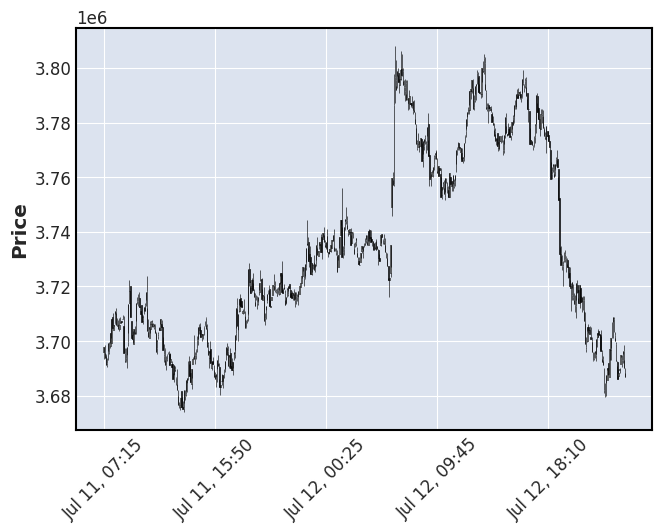

In [207]:
mpf.plot(df, type='candle')

In [211]:
df[190:200]

,High,Low,Open,Close
Timestamp,,,,
2021-07-11 23:35:00,3727059.0,3725228.0,3725228.0,3728258.0
2021-07-11 23:40:00,3729605.0,3727525.0,3728338.0,3734999.0
2021-07-11 23:45:00,3738188.0,3734185.0,3734718.0,3731600.0
2021-07-11 23:50:00,3732600.0,3730979.0,3730979.0,3733100.0
2021-07-11 23:55:00,3735254.0,3733617.0,3735254.0,3736336.0
2021-07-12 00:00:00,3739100.0,3735602.0,3735602.0,3732461.0
2021-07-12 00:05:00,3732462.0,3730001.0,3732462.0,3738017.0
2021-07-12 00:10:00,3738144.0,3737294.0,3737294.0,3739698.0
2021-07-12 00:15:00,3741911.0,3739000.0,3740000.0,3736320.0


In [212]:
df.to_csv('data/sample.csv')

Create DataFile and DataFrame

In [118]:
import pickle

In [3]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def save_dict_to_file(obj, name):
    f = open('obj/' + name,'w')
    f.write(str(obj))
    f.close()

def load_dict_from_file(name):
    f = open('obj/'+name,'r')
    data=f.read()
    f.close()
    return eval(data)

In [7]:
uri = 'http://192.168.100.111:3334/macd'
headers = {'Content-Type': 'application/json'}
period = "30"

In [18]:
year = 2017
month = 7
day = 5

startDate = datetime.datetime(year, month, day, 0, 0, 0, 0)
endDate = startDate + datetime.timedelta(days=1)
start = str(startDate.timestamp()*1000).replace(".0", "")
end = str(endDate.timestamp()*1000).replace(".0", "")

data = {}

In [20]:
retry = False
while startDate.year != 2022:
    if retry == False:
        startDate = startDate + datetime.timedelta(days=1)
        endDate = startDate + datetime.timedelta(days=1)
        start = str(startDate.timestamp()*1000).replace(".0", "")
        end = str(endDate.timestamp()*1000).replace(".0", "")
    retry = False
    query = f'{uri}?from={start}&to={end}&period={period}'
    result = requests.get(query, headers=headers)
    if result.status_code == requests.codes.ok and len(result.text) > 3:
        ticks = json.loads(result.text)['ticks']
        for tick in ticks:
            data[tick['timestamp']] = (float(tick['high']), float(tick['low']), float(tick['first']), float(tick['last']), datetime.datetime.fromtimestamp(float(tick['timestamp'])/1000))
            if startDate.month != month:
                month = startDate.month
                #save_dict_to_file(data, f'candle_{startDate.year}-{startDate.month}_temp')
    else:
        print(f'Connection Failed: {result.status_code}, content:{result.text}')
        retry = True
        if result.status_code == requests.codes.ok:
            retry = False

In [21]:
df = pd.DataFrame.from_dict(data, orient='index', columns = ['High', 'Low', 'Open', 'Close', 'Timestamp'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [22]:
len(df)

60632

In [23]:
df

,High,Low,Open,Close
Timestamp,,,,
2017-07-06 00:00:00,289801.0,289300.0,289801.0,289701.0
2017-07-06 00:30:00,289530.0,288245.0,289360.0,288729.0
2017-07-06 01:00:00,288970.0,287786.0,288719.0,288249.0
2017-07-06 01:30:00,288336.0,286575.0,288249.0,287349.0
2017-07-06 02:00:00,288099.0,286911.0,287280.0,287354.0
...,...,...,...,...
2021-10-14 08:00:00,6515000.0,6487200.0,6504349.0,6490000.0
2021-10-14 08:30:00,6493517.0,6473300.0,6487200.0,6484358.0
2021-10-14 09:00:00,6501847.0,6470001.0,6484276.0,6487999.0


/home/cow/python/torch/lib/python3.6/site-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


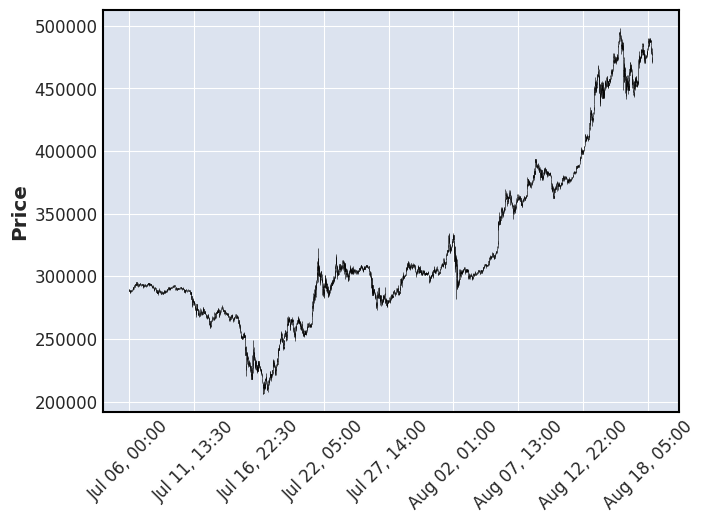

In [24]:
mpf.plot(df[0:12*24*7], type='candle')

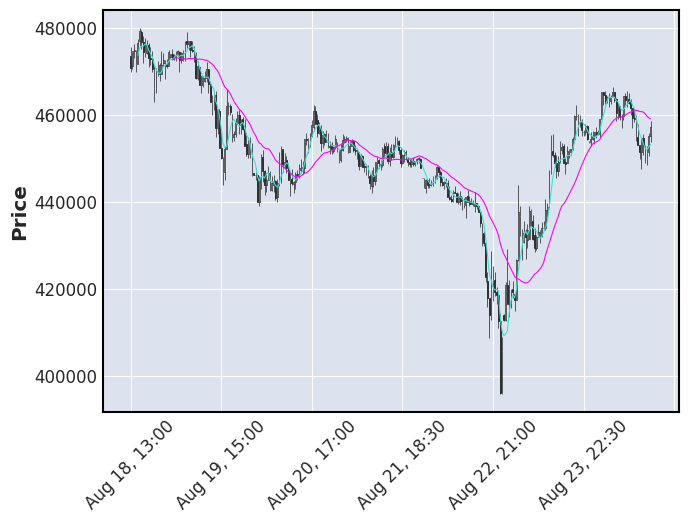

In [25]:
mpf.plot(df[12*24*7:12*24*7+12*24], type='candle', mav=(5, 25))

In [26]:
#targetDf = df[12*24*7-5:12*24*7+12*24]
targetDf = df[12*24*7-5:-1]
meanArray = []
mean5Array = []
trend = 0
boaders = []

for index, row in targetDf.iterrows():
    currentMean = (row.High + row.Low)/2
    meanArray.append(currentMean)

for mean in meanArray:
    index = len(mean5Array)
    if index > 2:
        mean5Value = 0
        for value in meanArray[index-2:index+3]:
            mean5Value += value
        mean5Value = mean5Value/5
        last5Value = mean5Array[-1]
        diff = mean5Value - last5Value
        mean5Array.append(mean5Value)
        if diff > 0:
            if trend == -1:
                boaders.append(([targetDf[index:index+1].index[0]] ,targetDf.iloc[index].Low))
            trend = 1
        else:
            if trend == 1:
                boaders.append(([targetDf[index:index+1].index[0]] ,targetDf.iloc[index].High))
            trend = -1
    else:
        mean5Array.append(mean)

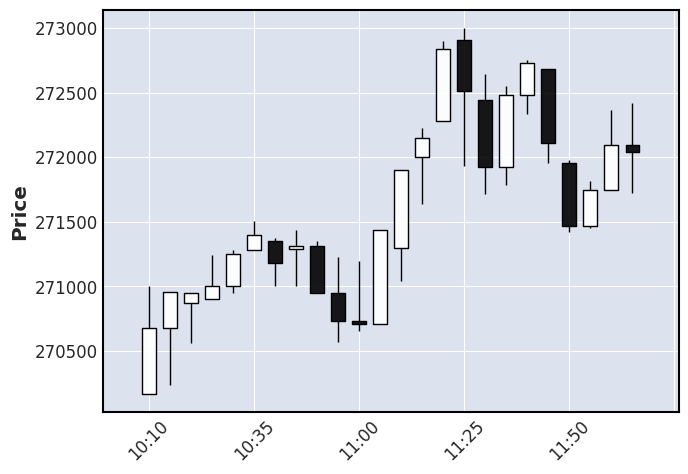

In [145]:
mpf.plot(df[12*24*7+12:12*24*7+36], type='candle')

In [27]:
currentBoaderIndex = 0
nextBoaderValues = []
ended = False
for index, row in targetDf.iterrows():
    if index <= boaders[currentBoaderIndex][0][0]:
        nextBoaderValues.append(boaders[currentBoaderIndex][1])
    else:
        while index > boaders[currentBoaderIndex][0][0]:
            if currentBoaderIndex < len(boaders)-1:
                currentBoaderIndex += 1
            else:
                ended = True
                break;
        if ended is True:
            nextBoaderValues.append(-1)
        else:
            nextBoaderValues.append(boaders[currentBoaderIndex][1])

In [28]:
targetDf['BoaderValue'] = nextBoaderValues

/home/cow/python/torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
targetDf

,High,Low,Open,Close,BoaderValue
Timestamp,,,,,
2017-08-18 10:30:00,485070.0,477500.0,484913.0,479001.0,473000.0
2017-08-18 11:00:00,483182.0,478000.0,479001.0,482360.0,473000.0
2017-08-18 11:30:00,482360.0,476500.0,482360.0,477999.0,473000.0
2017-08-18 12:00:00,478790.0,471021.0,478000.0,471175.0,473000.0
2017-08-18 12:30:00,474930.0,470000.0,471021.0,474080.0,473000.0
...,...,...,...,...,...
2021-10-14 07:30:00,6530210.0,6491266.0,6512499.0,6502862.0,6501847.0
2021-10-14 08:00:00,6515000.0,6487200.0,6504349.0,6490000.0,6501847.0
2021-10-14 08:30:00,6493517.0,6473300.0,6487200.0,6484358.0,6501847.0


In [30]:
targetDf.to_csv('data/bitcoin_boader_30.csv')

# Create Boader Data

In [31]:
targetDf = pd.read_csv('data/bitcoin_boader_30.csv', skiprows=[1,2,58620], index_col='Timestamp', parse_dates=True)

In [32]:
dataFrame = targetDf.copy().sort_index()

In [44]:
data = {}
SPAN=120
Interval = 30
for index in range(0, len(dataFrame)-3):
    if dataFrame[index+1:index+2].index[0] - dataFrame[index:index+1].index[0] > datetime.timedelta(minutes=SPAN):
        missingCount = (dataFrame[index+1:index+2].index[0] - dataFrame[index:index+1].index[0])/datetime.timedelta(minutes=Interval)
        for count in range(0, int(missingCount)-1):
            timestamp = dataFrame[index:index+1].index[0]+ datetime.timedelta(minutes=Interval)
            if dataFrame[index:index+1].Close.values[0] > dataFrame[index+1:index+2].Open.values[0]:
                diff = (dataFrame[index:index+1].Close.values[0] - dataFrame[index+1:index+2].Open.values[0])/missingCount
                openValue = dataFrame[index:index+1].Close.values[0] - diff * count
                closeValue = dataFrame[index:index+1].Close.values[0] - diff * (count+1)
                High = openValue * (1+abs(random.gauss(0, 0.0005)))
                Low = closeValue * (1-abs(random.gauss(0, 0.0005)))
            else:
                diff = (dataFrame[index+1:index+2].Open.values[0] - dataFrame[index:index+1].Close.values[0])/missingCount
                openValue = dataFrame[index:index+1].Close.values[0] + diff * count
                closeValue = dataFrame[index:index+1].Close.values[0] + diff * (count+1)
                High = closeValue * (1+abs(random.gauss(0, 0.0005)))
                Low = openValue * (1-abs(random.gauss(0, 0.0005)))
        data[timestamp] = [High, Low,openValue, closeValue, timestamp, dataFrame[index:index+1].BoaderValue.values[0]]
    else:
        continue

In [45]:
df = pd.DataFrame.from_dict(data, orient='index', columns = ['High', 'Low', 'Open', 'Close', 'Timestamp', 'BoaderValue'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [46]:
df

,High,Low,Open,Close,BoaderValue
Timestamp,,,,,
2017-09-27 13:00:00,4.337332e+05,4.333772e+05,4.335543e+05,4.336677e+05,430994.0
2017-11-06 17:30:00,8.403171e+05,8.394152e+05,8.402783e+05,8.401667e+05,846020.0
2017-11-09 04:30:00,8.410022e+05,8.408211e+05,8.408940e+05,8.408940e+05,846020.0
2017-11-11 12:30:00,7.721700e+05,7.710395e+05,7.712090e+05,7.711965e+05,744100.0
2017-11-18 21:00:00,8.684657e+05,8.664903e+05,8.665319e+05,8.683259e+05,868980.0
2017-11-24 04:00:00,9.063322e+05,9.057983e+05,9.062490e+05,9.061635e+05,903566.0
2017-12-01 05:30:00,1.116493e+06,1.115002e+06,1.116132e+06,1.115626e+06,1038633.0
2017-12-15 13:00:00,1.971735e+06,1.968650e+06,1.969012e+06,1.971342e+06,2062600.0
2018-08-30 13:30:00,7.842963e+05,7.838875e+05,7.839094e+05,7.842197e+05,785573.0


In [47]:
output = pd.concat([dataFrame, df], ignore_index=False).sort_index()
output

,High,Low,Open,Close,BoaderValue
Timestamp,,,,,
2017-08-18 11:30:00,482360.0,476500.0,482360.0,477999.0,473000.0
2017-08-18 12:00:00,478790.0,471021.0,478000.0,471175.0,473000.0
2017-08-18 12:30:00,474930.0,470000.0,471021.0,474080.0,473000.0
2017-08-18 13:00:00,475680.0,470000.0,473470.0,470749.0,473000.0
2017-08-18 13:30:00,474805.0,470500.0,471294.0,474800.0,473000.0
...,...,...,...,...,...
2021-10-14 07:00:00,6519000.0,6473195.0,6480000.0,6512152.0,6501847.0
2021-10-14 07:30:00,6530210.0,6491266.0,6512499.0,6502862.0,6501847.0
2021-10-14 08:00:00,6515000.0,6487200.0,6504349.0,6490000.0,6501847.0


In [48]:
output.to_csv('data/bitcoin_boader_30_filled120.csv')

# Create Data from MilliSeconds

In [50]:
targetDf = pd.read_csv('data/bitcoin_boader_30_filled120.csv', skiprows=[1,2,58653], index_col='Timestamp', parse_dates=True)

# Create DataLoader

In [51]:
import numpy as np
import pandas as pd
import datetime

In [52]:
output = pd.read_csv('data/bitcoin_boader_30_filled120.csv', skiprows=[58653], header=0, index_col=0, parse_dates=True)

In [53]:
output

,High,Low,Open,Close,BoaderValue
Timestamp,,,,,
2017-08-18 11:30:00,482360.0,476500.0,482360.0,477999.0,473000.0
2017-08-18 12:00:00,478790.0,471021.0,478000.0,471175.0,473000.0
2017-08-18 12:30:00,474930.0,470000.0,471021.0,474080.0,473000.0
2017-08-18 13:00:00,475680.0,470000.0,473470.0,470749.0,473000.0
2017-08-18 13:30:00,474805.0,470500.0,471294.0,474800.0,473000.0
...,...,...,...,...,...
2021-10-14 06:30:00,6508304.0,6437015.0,6451818.0,6478004.0,6501847.0
2021-10-14 07:00:00,6519000.0,6473195.0,6480000.0,6512152.0,6501847.0
2021-10-14 07:30:00,6530210.0,6491266.0,6512499.0,6502862.0,6501847.0


In [54]:
INTERVAL_DAYS = 2
MINUTES_SPAN = 30

totalMinutes = INTERVAL_DAYS * 24 * 60
span  = int(totalMinutes/MINUTES_SPAN)
span

96

In [55]:
dataFrame = output.sort_index()

In [56]:
count = 0
['High', 'Low', 'Open', 'Close','BoaderValue']
dataHigh = []
dataLow = []
dataOpen = []
dataClose = []
dataBoaderValue = []
dataDateTime = []

dataFrame = output.sort_index()

# create Array of arrayt which contain INTERVAL_DAYS candle info
for index in range(0, len(dataFrame) - span -2):
    if dataFrame[index+span:index+span+1].index[0] - dataFrame[index:index+1].index[0] == datetime.timedelta(days=INTERVAL_DAYS):
        dataHigh.append(dataFrame[index:index+span+1].High.values)
        dataLow.append(dataFrame[index:index+span+1].Low.values)
        dataOpen.append(dataFrame[index:index+span+1].Open.values)
        dataClose.append(dataFrame[index:index+span+1].Close.values)
        dataBoaderValue.append(dataFrame[index:index+span+1].BoaderValue.values)
        dataDateTime.append(dataFrame[index:index+span+1].index.values)

In [57]:
np.savez_compressed('data/bc_boader_30_2days.npz', High=np.asarray(dataHigh), Low=np.asarray(dataLow), Open=np.asarray(dataOpen), Close=np.asarray(dataClose),  BoaderValue=np.asarray(dataBoaderValue), DateTime=np.asarray(dataDateTime))

In [58]:
loaded_array = np.load('data/bc_boader_30_2days.npz')

INTERVAL_DAYS = 2
MINUTES_SPAN = 5

['High', 'Low', 'Open', 'Close','BoaderValue']
dataHigh = []
dataLow = []
dataOpen = []
dataClose = []
dataBoaderValue = []
dataTDateTime = []

dataFrame = output.sort_index()
skipIndex = -1

# create Array of arrayt which contain INTERVAL_DAYS candle info
for index in range(0, len(dataFrame)-3):
    print(index/(len(dataFrame)-3))
    currentData = []
    if index > skipIndex:
        skipIndex = -1
        for innerIndex in range(index,len(dataFrame)-3):
            # check if it doesn't over INTERVAL_DAYS
            if dataFrame[innerIndex:innerIndex+1].index[0] - dataFrame[index:index+1].index[0] < datetime.timedelta(days=INTERVAL_DAYS):
                # check if the diff of timestamp is less than span
                if dataFrame[innerIndex+1:innerIndex+2].index[0] - dataFrame[innerIndex:innerIndex+1].index[0] > datetime.timedelta(minutes=MINUTES_SPAN):
                    skipIndex = innerIndex
                    break
                else:
                    # add this row to currentData
                    rowData = dataFrame[innerIndex:innerIndex+1].values[0]
                    rowDataAppended = np.append(rowData, dataFrame[innerIndex:innerIndex+1].index[0])
                    currentData.append(rowDataAppended)
            else:
                # add currentData to Data. Then finish this loop
                data.append(currentData)
                break

df = pd.DataFrame(data)

df.to_csv('data/bc_boader_2days.csv')

In [ ]:
# fix low valus is not the min value: [251569. 250600. 250869. 251400. 250288.]